Titanic analysis project

1. 总人数
2. 生还的人数和遇难的人数
3. 男性和女性的分别的人数；
4. 生还的男性和女性的人数；
5. 生还的人的年龄段分布;
6. 舱位对生还比例有影响吗？
7. 票价高的生还比例高吗？
8. 亲戚也在船上的，一起生还吗？还是无关？
9. 父母也在船上的，一起生还吗？还是无关？

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

In [3]:
#Load the csv file
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#查看数据的整体情况
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


1. 发现Age字段有较多的‘NaN’值。考虑到714条记录有正常的Age值，足够用于分析。所以决定从总的Dataframe中去掉Age为‘NaN’的记录，只保留714条记录用于分析生还率。
2. Cabin字段有效记录数太少，所以不使用这个字段做分析。
3. Embarked字段有两个NaN记录，但这个字段是用于记录乘客从哪个港口登船的，明显和生还率无关。
4. 其他字段都是完整的

## 乘客总体生存情况分析

In [5]:
#获取乘客总数

Total_number = titanic_df.count()['PassengerId']
def get_male_female_number(titanic_df):
    result = titanic_df.groupby('Sex')['Sex'].count()
    return result['male'], result['female']

male_number, female_number = get_male_female_number(titanic_df)
print Total_number, male_number, female_number

891 577 314


总乘客数是：891

女性是：314

男性是：577

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


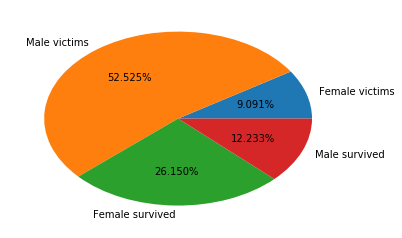

In [6]:
#获取基于性别的人员分布
survived_count = titanic_df.groupby(['Survived','Sex'])['Sex'].count()
print survived_count
labels = ['Female victims','Male victims','Female survived','Male survived']
plt.pie(survived_count.values, labels=labels,autopct = '%3.3f%%')
plt.show()

### 基于性别的生存人数和遇难人数的分布如上图

In [7]:
#因为Survived的值是0,1，取基于性别汇总后的均值，就是男性和女性的生还率
titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

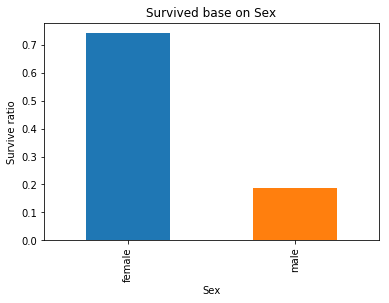

In [8]:
titanic_df.groupby('Sex')['Survived'].mean().plot(kind ='bar')
plt.title('Survived base on Sex')
plt.ylabel('Survive ratio')
plt.show()

### 结论：
幸存人数为 342 人，

其中男性109人，占男性总数的18.9%

女性233人,占女性总数的74.2%

可以推断女性乘客的生存比例远高于男性

## 基于年龄和性别分析生存率

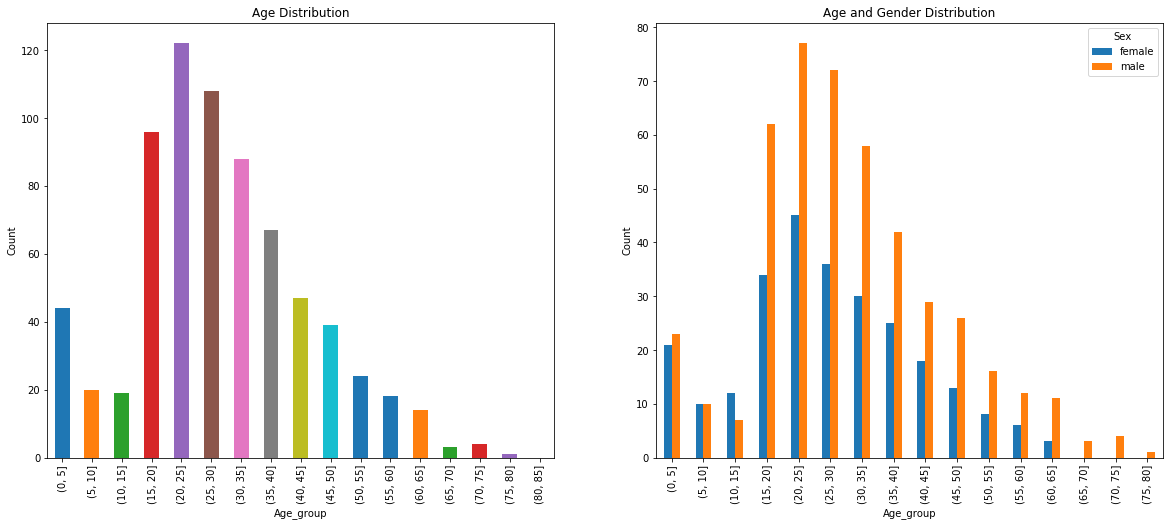

Age_group
(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
(80, 85]      0
Name: Survived, dtype: int64

Sex        female  male
Age_group              
(0, 5]       21.0  23.0
(5, 10]      10.0  10.0
(10, 15]     12.0   7.0
(15, 20]     34.0  62.0
(20, 25]     45.0  77.0
(25, 30]     36.0  72.0
(30, 35]     30.0  58.0
(35, 40]     25.0  42.0
(40, 45]     18.0  29.0
(45, 50]     13.0  26.0
(50, 55]      8.0  16.0
(55, 60]      6.0  12.0
(60, 65]      3.0  11.0
(65, 70]      NaN   3.0
(70, 75]      NaN   4.0
(75, 80]      NaN   1.0


In [9]:
#乘客的年龄分布,以5岁为单位来计算年龄分布
bins = np.arange(0,90,5)
titanic_df['Age_group'] = pd.cut(titanic_df['Age'],bins)
#titanic_df.info()

#先去掉年龄是NaN的记录
titanic_without_nan = titanic_df[titanic_df.Age >= 0]

#再统计年龄段的人数分布，以及年龄段的男女人数分布
plt.figure(figsize = (12,5))
f, (ax1,ax2) = plt.subplots(1,2)
f.set_size_inches((20,8))
age_group = titanic_without_nan.groupby('Age_group')["Survived"]

#titanic_without_nan.groupby('Age_group')["Survived"].count().unstack().plot(kind='bar',ax=ax1, stacked=False)
#print titanic_without_nan.groupby('Age_group')["Survived"].count()
age_group.count().plot(kind='bar',ax=ax1,stacked=False)
#print titanic_without_nan.groupby(['Age_group','Sex'])['Survived'].count()
#titanic_without_nan.groupby(['Age_group','Sex'])["Survived"].count().unstack().plot(kind='bar',ax=ax1, stacked=False)
ax1.set_title('Age Distribution')
ax1.set_ylabel('Count')

#titanic_without_nan.groupby(['Age_group','Sex'])["Survived"].loc(1).count().unstack().plot(kind='bar',ax=ax2)
age_gender_group = titanic_without_nan.groupby(['Age_group','Sex'])["Survived"]
age_gender_group.count().unstack().plot(kind='bar',ax=ax2,stacked=False)
ax2.set_title('Age and Gender Distribution')
ax2.set_ylabel('Count')
plt.show()

print age_group.count()
print ''
print age_gender_group.count().unstack()

基于上述数据，大部分乘客的年龄集中在15岁至50之间。男性和女性的年龄分布也是如此。

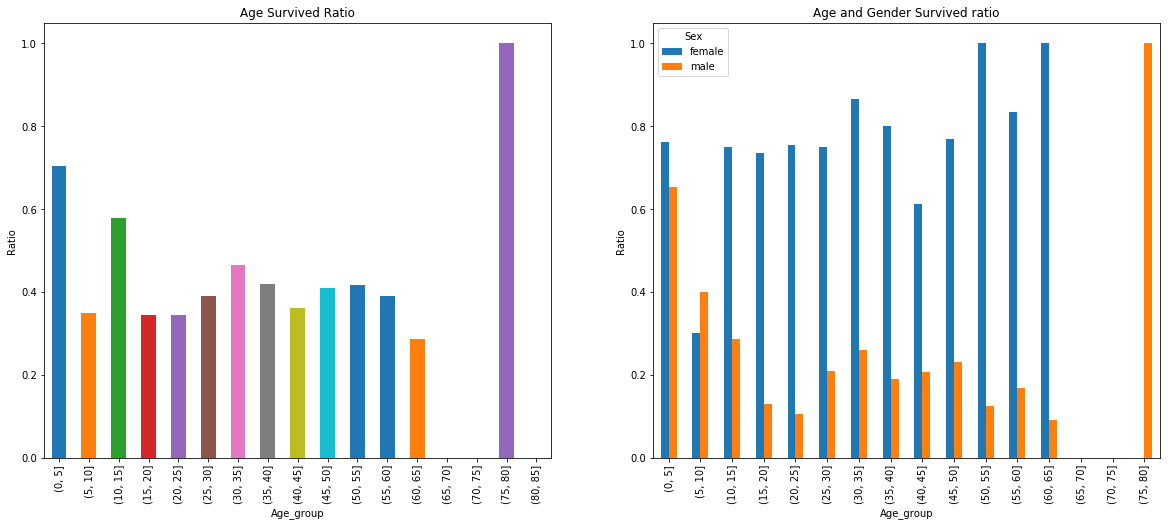

Age_group
(0, 5]      0.704545
(5, 10]     0.350000
(10, 15]    0.578947
(15, 20]    0.343750
(20, 25]    0.344262
(25, 30]    0.388889
(30, 35]    0.465909
(35, 40]    0.417910
(40, 45]    0.361702
(45, 50]    0.410256
(50, 55]    0.416667
(55, 60]    0.388889
(60, 65]    0.285714
(65, 70]    0.000000
(70, 75]    0.000000
(75, 80]    1.000000
(80, 85]         NaN
Name: Survived, dtype: float64

Sex          female      male
Age_group                    
(0, 5]     0.761905  0.652174
(5, 10]    0.300000  0.400000
(10, 15]   0.750000  0.285714
(15, 20]   0.735294  0.129032
(20, 25]   0.755556  0.103896
(25, 30]   0.750000  0.208333
(30, 35]   0.866667  0.258621
(35, 40]   0.800000  0.190476
(40, 45]   0.611111  0.206897
(45, 50]   0.769231  0.230769
(50, 55]   1.000000  0.125000
(55, 60]   0.833333  0.166667
(60, 65]   1.000000  0.090909
(65, 70]        NaN  0.000000
(70, 75]        NaN  0.000000
(75, 80]        NaN  1.000000


In [10]:
#再分析各个年龄段的生还比率
plt.figure(figsize = (12,5))
f, (ax1,ax2) = plt.subplots(1,2)
f.set_size_inches((20,8))
#print titanic_without_nan.groupby(['Age_group','Sex'])['Survived'].count()
age_group.mean().plot(kind='bar',ax=ax1, stacked=False)
ax1.set_title('Age Survived Ratio')
ax1.set_ylabel('Ratio')

age_gender_group.mean().unstack().plot(kind='bar',ax=ax2)

ax2.set_title('Age and Gender Survived ratio')
ax2.set_ylabel('Ratio')
plt.show()

print age_group.mean()
print ''
print age_gender_group.mean().unstack()

从总体年龄的生存比例图形中可以看出，0-5岁儿童和10-15岁少年生存比例较高，其他年龄段比例接近。
再分析基于性别的生存比例，可以看出成年人中，女性生存比例远高于男性。而15岁以下生存比例接近。

### 结论：
综上分析，儿童（10岁以下）和女性生存比例最高

## 再考察其他影响生还的因素

### 舱位和生还的相关性分析

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


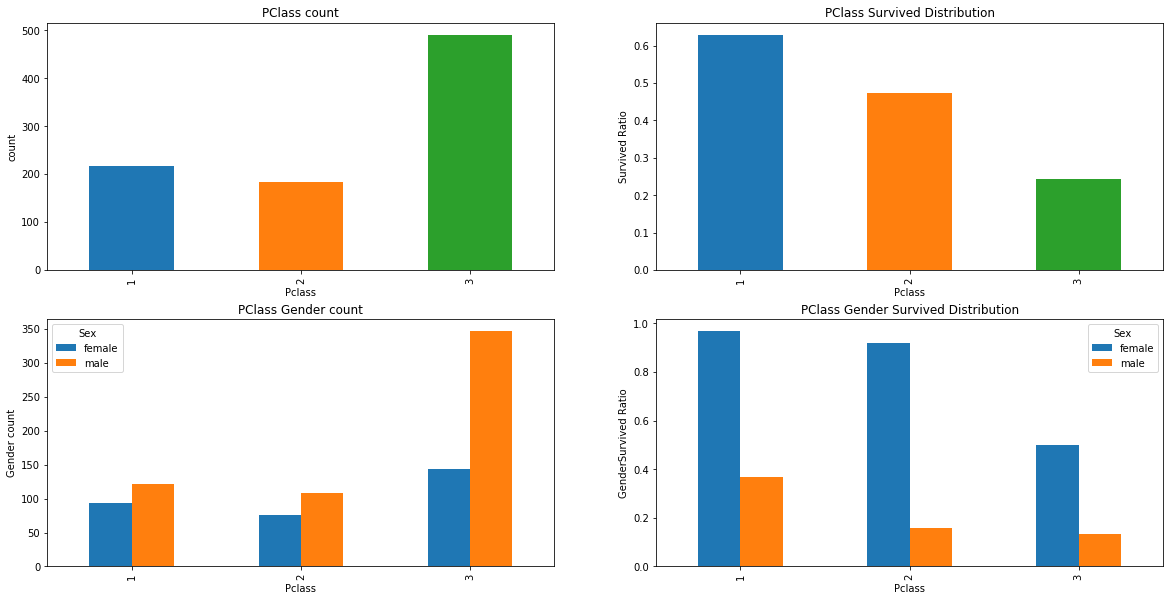

In [11]:
#舱位和生还之间的关系
#各个舱位的总人数和生还比例
pclass_group = titanic_df.groupby('Pclass')['Survived']
print pclass_group.count()
print pclass_group.mean()

#按性别统计各个舱位的总人数和生还比例
pclass_gender_group = titanic_df.groupby(['Pclass','Sex'])['Survived']
print pclass_gender_group.count().unstack()
print pclass_gender_group.mean().unstack()

plt.figure(figsize = (12,5))
f, ((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2)
f.set_size_inches((20,10))

pclass_group.count().plot(kind='bar',ax=ax11)
pclass_group.mean().plot(kind='bar',ax=ax12)

ax11.set_title('PClass count')
ax11.set_ylabel('count')

ax12.set_title('PClass Survived Distribution')
ax12.set_ylabel('Survived Ratio')

pclass_gender_group.count().unstack().plot(kind='bar',ax=ax21)
pclass_gender_group.mean().unstack().plot(kind='bar',ax=ax22)

ax21.set_title('PClass Gender count')
ax21.set_ylabel('Gender count')

ax22.set_title('PClass Gender Survived Distribution')
ax22.set_ylabel('GenderSurvived Ratio')
plt.show()

### 结论：
可以看出三等舱位的乘客最多，但生还比例最低。
一等舱生还比例最高，二等舱稍低一些。
各个舱位的女性生还比例比同舱位男性高很多，但三等舱女性生还比例要低很多。
是什么原因导致这个现象呢？基于现有数据无法推断。

### 票价和生还之间的相关性分析


fare_group_code        0         1         2         3         4         5   \
Pclass                                                                        
1                0.000000  0.500000  0.631579  0.676471  0.857143  0.733333   
2                0.428571  0.585714  0.666667  0.285714       NaN       NaN   
3                0.249377  0.196970  0.384615  0.000000       NaN       NaN   

fare_group_code        6         7    8     10   11   12        13   25  
Pclass                                                                   
1                0.857143  0.666667  1.0  0.75  0.6  0.5  0.666667  1.0  
2                     NaN       NaN  NaN   NaN  NaN  NaN       NaN  NaN  
3                     NaN       NaN  NaN   NaN  NaN  NaN       NaN  NaN  


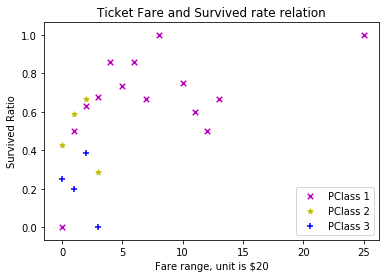

In [27]:
#票价和生还之间的关系
#print titanic_df.groupby('Pclass')['Fare'].describe()
print ''
bins = np.arange(0,540,20)
titanic_df['Fare_group'] = pd.cut(titanic_df['Fare'],bins)
titanic_df['fare_group_code'] = titanic_df['Fare_group'].cat.codes

#titanic_df.info()
titanic_fare_not_nan = titanic_df[titanic_df['Fare']>0]

#基于仓位和票价区间分类，计算每个仓位、区间的生还率
fare_group = titanic_fare_not_nan.groupby(['Pclass','fare_group_code'])['Survived']
print fare_group.mean().unstack()

#生成散点图
plt.scatter(fare_group.mean()[1].index, fare_group.mean()[1].values, marker = 'x', color = 'm', label='PClass 1', s = 30)
plt.scatter(fare_group.mean()[2].index, fare_group.mean()[2].values, marker = '*', color = 'y', label='PClass 2', s = 30)
plt.scatter(fare_group.mean()[3].index, fare_group.mean()[3].values, marker = '+', color = 'b', label='PClass 3', s = 30)
plt.xlabel('Fare range, unit is $20')
plt.ylabel('Survived Ratio')
plt.title('Ticket Fare and Survived rate relation')
plt.legend()
plt.show()

#print np.corrcoef(titanic_df['Fare'].values, titanic_df['Survived'].values)[1,0]

### 分析结论：从散点图来分析，票价和生还之间的相关性很低

### 亲戚和生还之间的相关性分析

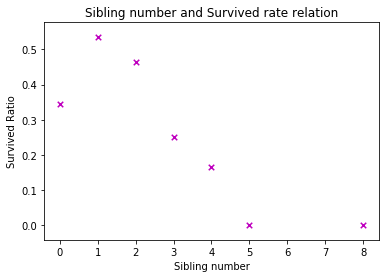

-0.851638017628


In [28]:
#Sibling和生还之间的相关性分析
titanic_sibling = titanic_df.groupby('SibSp')['Survived']

plt.scatter(titanic_sibling.mean().index, titanic_sibling.mean().values, marker = 'x', color = 'm', s = 30)
plt.xlabel('Sibling number')
plt.ylabel('Survived Ratio')
plt.title('Sibling number and Survived rate relation')
plt.show()

print np.corrcoef(titanic_sibling.mean().index, titanic_sibling.mean().values)[1,0]

### 结论：Sibling个数和生还之间的相关性很低

### Parent和生还之间的相关性分析

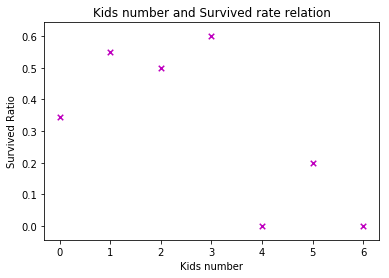

-0.681289394707


In [29]:
#Parent和生还之间的相关性分析
titanic_parch = titanic_df.groupby('Parch')['Survived']
plt.scatter(titanic_parch.mean().index, titanic_parch.mean().values, marker = 'x', color = 'm', s = 30)
plt.xlabel('Kids number')
plt.ylabel('Survived Ratio')
plt.title('Kids number and Survived rate relation')
plt.show()

print np.corrcoef(titanic_parch.mean().index, titanic_parch.mean().values)[1,0]

### 结论：父母和子女一起在船上的和生还之间的相关性很低

## 最终结论：

基于上述分析，影响生还的主要因素是三个：
1. 女性；
2. 0-10岁的孩子
3. 位于一等舱和二等舱

### 可能导致分析有偏差的影响因素

1. 样本数量：
据网络信息描述“https://baike.baidu.com/item/%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7/5677”
船上共有2224名人员。本项目提供的数据是891条，但本项目的背景信息中没有描述所提供的数据是否是随机的筛选的。在这里我们假设数据的是随机的，均匀的，并且样本数量达到总样本的三分之一，可以认为满足分析的要求。
但如果所提供的数据不是随机的，均匀的，比如所包含的生还的数据（儿童，女性）比例高于实际情况，则可能影响上述分析结论。

2. 被删除的记录：
在分析年龄的数据的时候，有200多条记录没有年龄数据，我这里采用了删除这些记录，只对剩余的714条记录做分析，如果这被删除的200多条记录中，生还的记录比例很高，这将会导致分析结果产生偏差。或者被删除的记录中，某个年龄段的生还记录比较集中，但是我们没有相关的信息，这导致分析的结果和实际情况之间有偏差。

3. 缺失的信息：
乘客记录中是包含旅客和船员的，但提供的记录中没有区分哪些是旅客，哪些是船员。也许船员利用便利，获得更多的逃生机会；或者也许船员尽职把逃生机会让给旅客，不同的行为导致船员的生还率发生很大的变化。但目前没有记录可分析。